In [41]:
#Multi-class Classification
import zipfile
import nibabel as nib
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.utils import make_grid
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import glob
from torch.autograd import Variable
from torchvision import models
from torch.nn import Module,  Linear, ReLU, CrossEntropyLoss, Sequential, Conv3d, MaxPool3d, Softmax, BatchNorm3d
from torch.optim import Adam
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import seaborn as sn
import torch.optim as optim
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [69]:
sample = glob.glob(r'/content/drive/MyDrive/ADNI_full/AD/mwp1ADNI_002_S_0729_MR_MT1__GradWarp__N3m_Br_20120322163605283_S89463_I291876.nii.gz')
Adsamples=sample
Adfiles=len(Adsamples)
print('Found ', str(Adfiles), ' nifti files')

Found  1  nifti files


In [85]:
#Loading files using Nibabel library
x_range_from = 10; x_range_to = 110
y_range_from = 40; y_range_to = 95
z_range_from = 5; z_range_to = 105

Ad_images= np.zeros((Adfiles, z_range_to-z_range_from, x_range_to-x_range_from, y_range_to-y_range_from, 1), dtype=np.float32)

for i in range(Adfiles): # Loading files
  if (i % 10 == 0):
    print('Loading file %d of %d' % (i+1, Adfiles))
  img = nib.load(Adsamples[i])
  img =  img.get_fdata()[x_range_from:x_range_to, y_range_from:y_range_to, z_range_from:z_range_to]
  img= np.transpose(img, (2,0,1))
  img = np.flip(img)
  Ad_images[i,:,:,:,0] = np.nan_to_num(img)
print('The shape of an image', Ad_images.shape)

Loading file 1 of 1
The shape of an image (1, 100, 100, 120, 1)


# Display an image

(100, 100, 120)
Display an image ['/content/drive/MyDrive/ADNI_full/AD/mwp1ADNI_002_S_0729_MR_MT1__GradWarp__N3m_Br_20120322163605283_S89463_I291876.nii.gz']


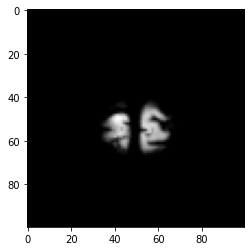

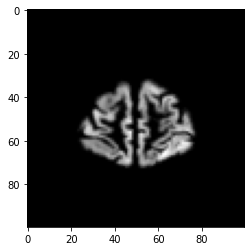

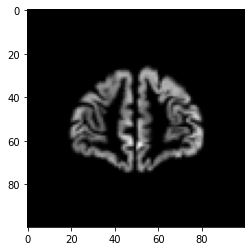

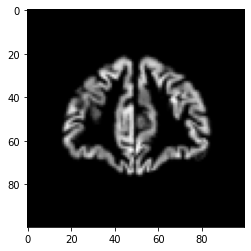

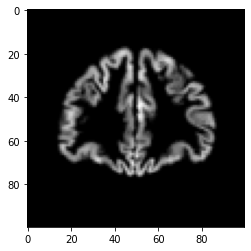

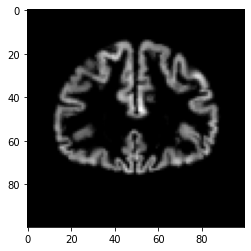

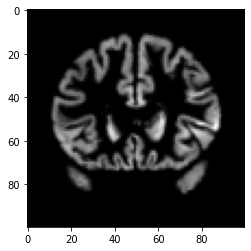

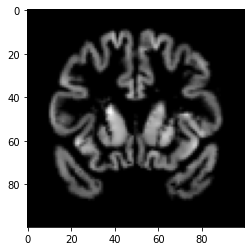

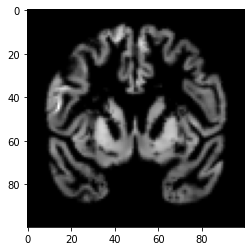

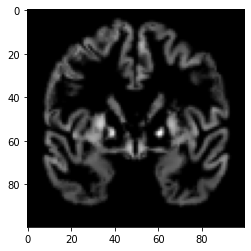

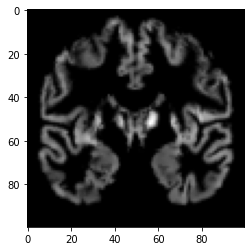

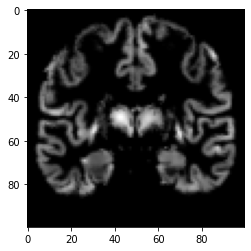

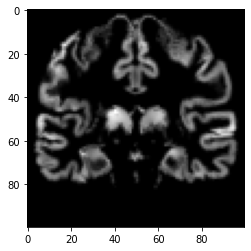

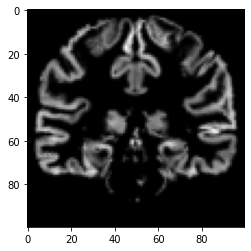

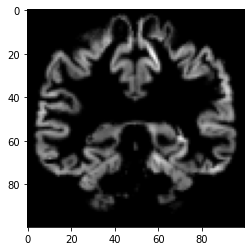

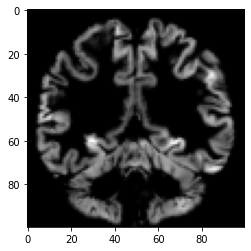

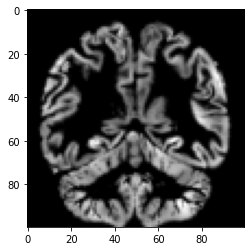

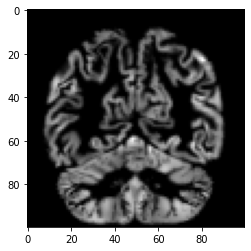

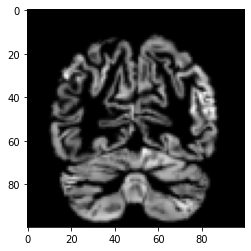

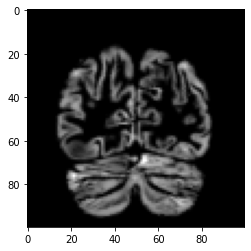

In [87]:
sample_image= Ad_images[0,:,:,:,0]
print(sample_image.shape)
print('Display an image', Adsamples)
#print(sample_image[0:20:30])
for i in range(sample_image.shape[0]):
  if (i % 5 == 0):
    plt.figure(),
    s=sample_image[:,:,i]
    plt.imshow(s, cmap='gray');

#Second AD Sample Display

In [89]:
sample = glob.glob(r'/content/drive/MyDrive/ADNI_full/AD/mwp1ADNI_003_S_1057_MR_MT1__GradWarp__N3m_Br_20120420154238621_S147492_I299336.nii.gz')
Adsamples=sample
Adfiles=len(Adsamples)
print('Found ', str(Adfiles), ' nifti files')



Found  1  nifti files


In [92]:
#Loading files using Nibabel library
x_range_from = 10; x_range_to = 110
y_range_from = 40; y_range_to = 130
z_range_from = 5; z_range_to = 105

Ad_images= np.zeros((Adfiles, z_range_to-z_range_from, x_range_to-x_range_from, y_range_to-y_range_from, 1), dtype=np.float32)

for i in range(Adfiles): # Loading files
  if (i % 10 == 0):
    print('Loading file %d of %d' % (i+1, Adfiles))
  img = nib.load(Adsamples[i])
  img =  img.get_fdata()[x_range_from:x_range_to, y_range_from:y_range_to, z_range_from:z_range_to]
  img= np.transpose(img, (2,0,1))
  img = np.flip(img)
  Ad_images[i,:,:,:,0] = np.nan_to_num(img)
print('The shape of an image', Ad_images.shape)

Loading file 1 of 1
The shape of an image (1, 100, 100, 60, 1)


(100, 100, 60)
Display an image ['/content/drive/MyDrive/ADNI_full/AD/mwp1ADNI_003_S_1057_MR_MT1__GradWarp__N3m_Br_20120420154238621_S147492_I299336.nii.gz']


IndexError: ignored

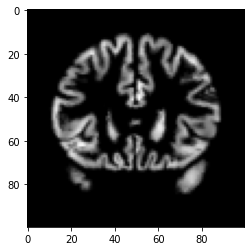

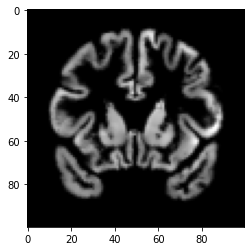

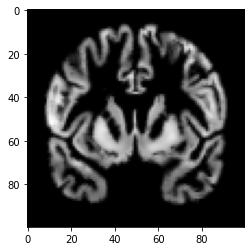

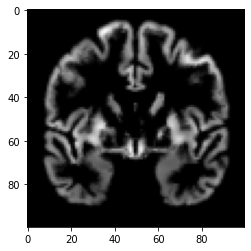

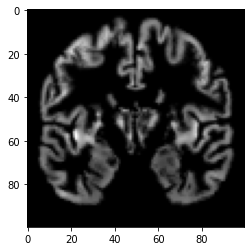

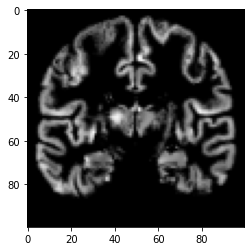

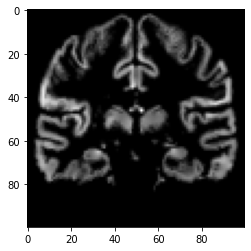

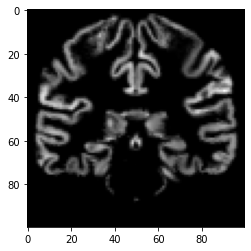

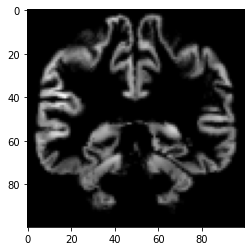

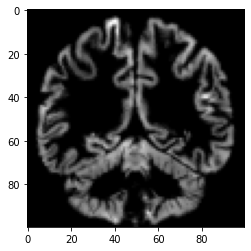

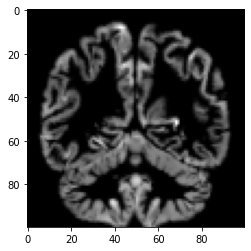

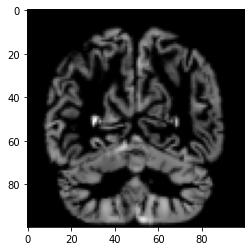

<Figure size 432x288 with 0 Axes>

In [93]:
sample_image= Ad_images[0,:,:,:,0]
print(sample_image.shape)
print('Display an image', Adsamples)
#print(sample_image[0:20:30])
for i in range(sample_image.shape[0]):
  if (i % 5 == 0):
    plt.figure(),
    s=sample_image[:,:,i]
    plt.imshow(s, cmap='gray');

# CN Samples Scan

In [95]:
samples = glob.glob(r'/content/drive/MyDrive/ADNI_full/CN/mwp1ADNI_002_S_4213_MR_MT1__N3m_Br_20120327112043431_S144143_I293719.nii.gz')
CN_samples=samples
CNfiles=len(CN_samples)
print('Found ', str(CNfiles), ' nifti files')

Found  1  nifti files


In [99]:
#Loading files using Nibabel library
x_range_from = 10; x_range_to = 110
y_range_from = 10; y_range_to = 130
z_range_from = 5; z_range_to = 105

CN_images= np.zeros((CNfiles, z_range_to-z_range_from, x_range_to-x_range_from, y_range_to-y_range_from, 1), dtype=np.float32)

for i in range(CNfiles): # Loading files
  if (i % 5 == 0):
    print('Loading file %d of %d' % (i+1, CNfiles))
  img = nib.load(CN_samples[i])
  img =  img.get_fdata()[x_range_from:x_range_to, y_range_from:y_range_to, z_range_from:z_range_to]
  img= np.transpose(img, (2,0,1))
  img = np.flip(img)
  CN_images[i,:,:,:,0] = np.nan_to_num(img)
print('The shape of an image', CN_images.shape)

Loading file 1 of 1
The shape of an image (1, 100, 100, 120, 1)


(100, 100, 120)
Display an image ['/content/drive/MyDrive/ADNI_full/AD/mwp1ADNI_003_S_1057_MR_MT1__GradWarp__N3m_Br_20120420154238621_S147492_I299336.nii.gz']


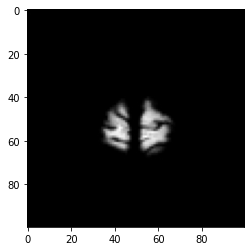

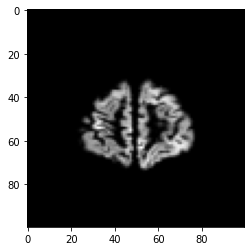

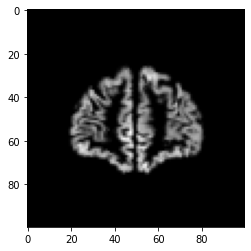

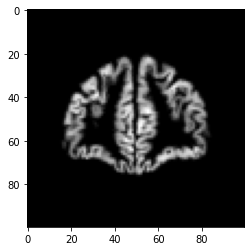

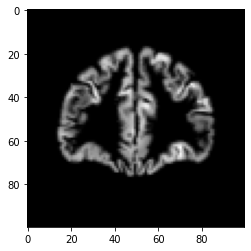

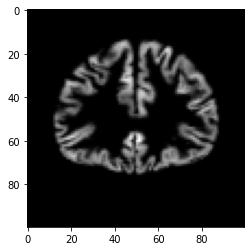

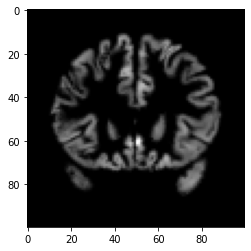

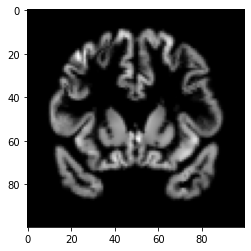

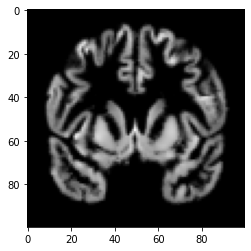

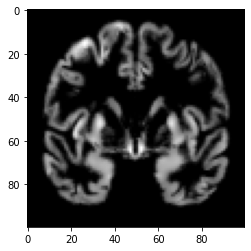

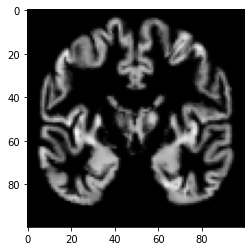

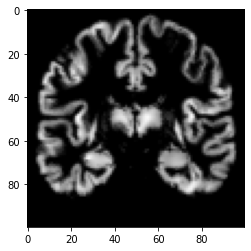

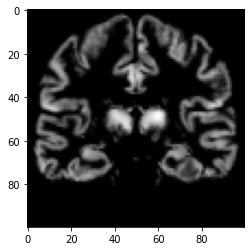

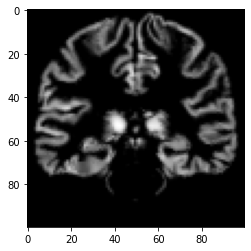

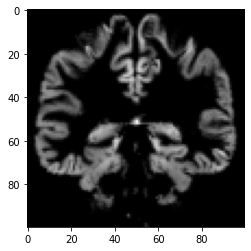

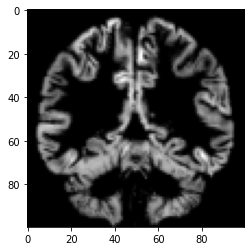

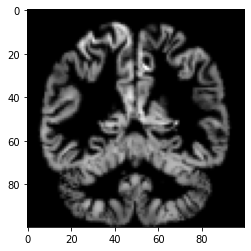

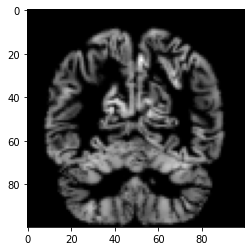

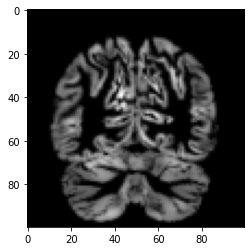

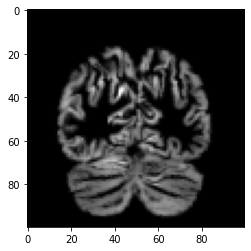

In [100]:
sample_image= CN_images[0,:,:,:,0]
print(sample_image.shape)
print('Display an image', Adsamples)
#print(sample_image[0:20:30])
for i in range(sample_image.shape[0]):
  if (i % 5 == 0):
    plt.figure(),
    s=sample_image[:,:,i]
    plt.imshow(s, cmap='gray');

#CN Sample with reduce dimensions

In [101]:
samples = glob.glob(r'/content/drive/MyDrive/ADNI_full/CN/mwp1ADNI_033_S_0923_MR_MPR__GradWarp__B1_Correction__N3_Br_20110221124121979_S93412_I218371.nii.gz')
CN_samples=samples
CNfiles=len(CN_samples)
print('Found ', str(CNfiles), ' nifti files')

Found  1  nifti files


In [102]:
#Loading files using Nibabel library
x_range_from = 10; x_range_to = 110
y_range_from = 40; y_range_to = 100
z_range_from = 5; z_range_to = 105

CN_images= np.zeros((CNfiles, z_range_to-z_range_from, x_range_to-x_range_from, y_range_to-y_range_from, 1), dtype=np.float32)

for i in range(CNfiles): # Loading files
  if (i % 5 == 0):
    print('Loading file %d of %d' % (i+1, CNfiles))
  img = nib.load(CN_samples[i])
  img =  img.get_fdata()[x_range_from:x_range_to, y_range_from:y_range_to, z_range_from:z_range_to]
  img= np.transpose(img, (2,0,1))
  img = np.flip(img)
  CN_images[i,:,:,:,0] = np.nan_to_num(img)
print('The shape of an image', CN_images.shape)

Loading file 1 of 1
The shape of an image (1, 100, 100, 60, 1)


(100, 100, 60)
Display an image ['/content/drive/MyDrive/ADNI_full/AD/mwp1ADNI_003_S_1057_MR_MT1__GradWarp__N3m_Br_20120420154238621_S147492_I299336.nii.gz']


IndexError: ignored

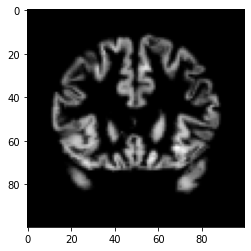

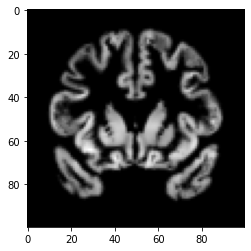

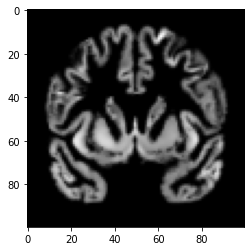

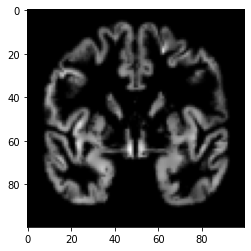

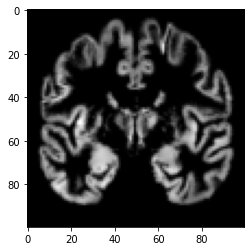

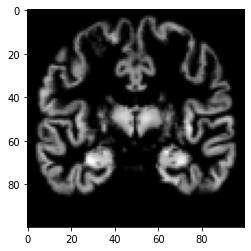

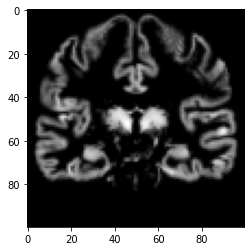

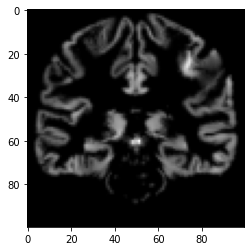

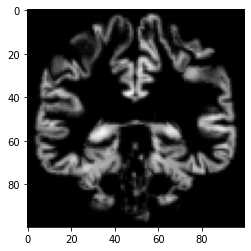

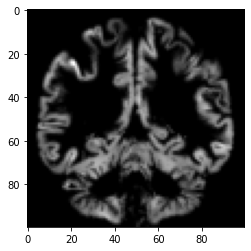

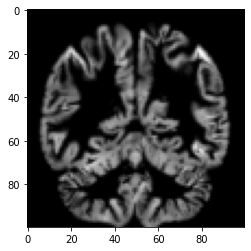

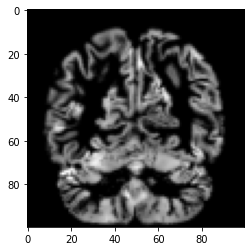

<Figure size 432x288 with 0 Axes>

In [103]:
sample_image= CN_images[0,:,:,:,0]
print(sample_image.shape)
print('Display an image', Adsamples)
#print(sample_image[0:20:30])
for i in range(sample_image.shape[0]):
  if (i % 5 == 0):
    plt.figure(),
    s=sample_image[:,:,i]
    plt.imshow(s, cmap='gray');